# Regressão Linear Múltipla

## 1. Informações do Dataset

### 1.1 Dataset 

Boston Housing Dataset, que é um conjunto de dados que tem a taxa média de ocupação das casas, juntamente com outras 13 variáveis que podem estar relacionadas aos preços das casas. Esses são os fatores como condições socioeconômicas, condições ambientais, instalações educacionais e alguns outros fatores semelhantes. Existem 506 observações nos dados para 14 variáveis. Existem 12 variáveis numéricas em nosso conjunto de dados e 1 variável categórica. O objetivo é construir um modelo de regressão linear para estimar a taxa média de ocupação das casas pelos proprietários em Boston.

In [ ]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

### 1.2 Características do Dataset

Multivariado <br>
Número de instâncias: 506 <br>
Número de atributos: 14 <br>
Valores faltando: Não <br>
Características dos atributos: categórico, inteiro e real <br>
Origem: StatLib library que é mantido pela Universidade de Carnegie Mellon

Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

1. CRIM: per capita crime rate by town                                        (taxa de criminalidade per capita na cidade )
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. )
3. INDUS: proportion of non-retail business acres per town (proporção de acres de negócios não varejistas por cidade )
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (Variável dummy de Charles River (= 1 se a área limita o rio; 0 caso contrário))
5. NOX: nitric oxides concentration (parts per 10 million) (concentração de óxidos nítricos (partes por 10 milhões) )
6. RM: average number of rooms per dwelling (número médio de quartos por habitação)
7. AGE: proportion of owner-occupied units built prior to 1940 (proporção de unidades ocupadas pelo proprietário construídas antes de 1940 )
8. DIS: weighted distances to five Boston employment centres (distâncias ponderadas até cinco centros de empregos de Boston )
9. RAD: index of accessibility to radial highways (índice de acessibilidade a rodovias radiais )
10. TAX: full-value property-tax rate per 10,000 (valor total da taxa de imposto sobre a propriedade por 10.000 )
11. PTRATIO: pupil-teacher ratio by town (proporção aluno-professor por cidade )
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (1000 (Bk - 0,63) ^ 2, onde Bk é a proporção de negros por cidade )
13. LSTAT: % lower status of the population (% de status inferior da população )
14. TARGET: Median value of owner-occupied homes in 1000 dolarés (Valor médio das casas ocupadas pelo proprietário em US $ 1.000 )

## 2. Bibliotecas

In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

## 3. Análise Exploratória 



### 3.1 Dataframe

In [ ]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [ ]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.ZN.unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

### 3.2 Algumas Estatísticas

In [ ]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [ ]:
valor_medio_esperado_na_previsao

22.532806324110698

In [ ]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


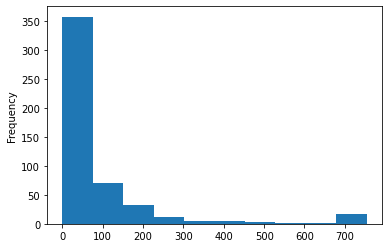

In [ ]:
# Histograma dos erros
# Temos mais erros "pequenos", ou seja, mais valores próximos à média.
hist_plot = squared_errors.plot(kind='hist')

### 3.3 Correlação das colunas

In [ ]:
# Calculando a correlação  
correlacoes = dataset.corr()

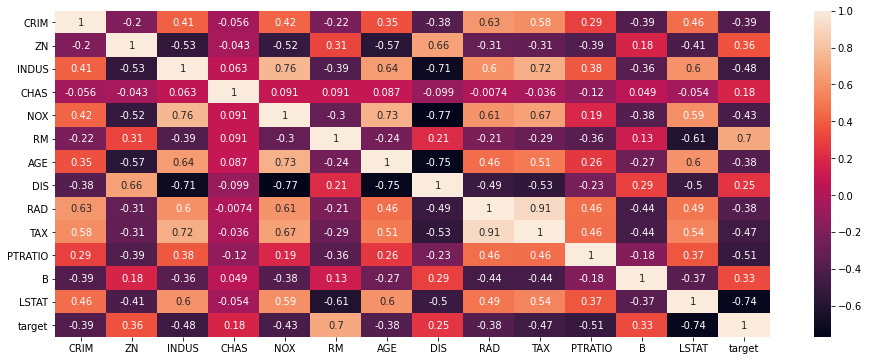

In [ ]:
# Usando o método heatmap do seaborn
plt.figure(figsize = (16, 6))
sns.heatmap(data = correlacoes, annot = True);

Para Regressão Linear Múltipla usaremos como variáveis explanatórias:

* **RM** - número médio de quartos por habitação.

* **ZN** - proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.

* **B** - 1000 (Bk - 0,63) ^ 2, onde Bk é a proporção de negros por cidade.

* **DIS** - distâncias ponderadas até cinco centros de empregos de Boston.

## 4. Regressão Linear com Statsmodels

https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# Definindo os valores de X e y
X = dataset[['RM', 'ZN', 'B', 'DIS']]
y = dataset['target'].values

In [ ]:
# Adicionando um termo constante ao valor de X (Matriz)
X = sm.add_constant(X)
X = X.values

In [ ]:
# Fit modelo de regressão
modelo = sm.OLS(y, X).fit()

# Estatística
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 04 May 2021   Prob (F-statistic):           9.26e-88
Time:                        22:54:23   Log-Likelihood:                -1632.8
No. Observations:                 506   AIC:                             3276.
Df Residuals:                     501   BIC:                             3297.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4461      2.708    -13.830      0.0

* R-quadrado é 0.559. Este modelo explica 55,9% da variância na variável dependente.

* O valor p (P>|t|) de três variáveis é pequeno, logo, são um indicador estatisticamente significativo do target.

In [ ]:
print('Predicted values: ', modelo.predict(X))

Predicted values:  [ 2.62359168e+01  2.36361318e+01  2.97980096e+01  2.80483928e+01
  2.93245889e+01  2.33813670e+01  2.08953564e+01  2.21451866e+01
  1.74308318e+01  2.03679001e+01  2.36242443e+01  2.07436247e+01
  1.97895535e+01  1.98300590e+01  2.06829226e+01  1.89063261e+01
  1.95208316e+01  2.00264686e+01  1.33842215e+01  1.80832753e+01
  1.64468381e+01  2.00206126e+01  2.15857408e+01  1.88041094e+01
  1.96360906e+01  1.47499981e+01  1.82350343e+01  1.84934878e+01
  2.41468576e+01  2.54777180e+01  1.71163889e+01  2.04746444e+01
  1.60156971e+01  1.70902504e+01  1.76488389e+01  2.00199605e+01
  1.87917638e+01  1.92030427e+01  2.00900001e+01  2.96310308e+01
  3.31463442e+01  2.60372077e+01  2.10625659e+01  2.16763032e+01
  2.03894129e+01  1.75484331e+01  1.84006892e+01  2.01587489e+01
  1.50459288e+01  1.66575925e+01  2.07270230e+01  2.19339811e+01
  2.52503276e+01  2.10464105e+01  2.34110233e+01  3.51530924e+01
  2.76494475e+01  3.22468090e+01  2.21123898e+01  2.06874733e+01
  1.90

In [ ]:
predictions = modelo.predict(X)
df_results = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_results

,Actual,Predicted
0,24.0,26.235917
1,21.6,23.636132
2,34.7,29.798010
3,33.4,28.048393
4,36.2,29.324589
...,...,...
501,22.4,25.519261
502,20.6,21.808015
503,23.9,28.851333
504,22.0,27.223271


### 4.1 Gerando um ScatterPlot com a Linha de Regressão

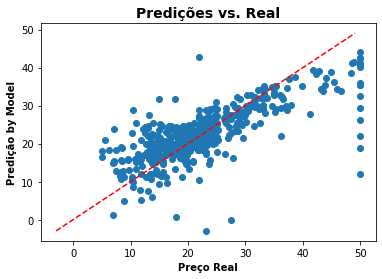

In [ ]:
plt.scatter(x = 'Actual', y = 'Predicted', data = df_results)

plt.title("Predições vs. Real", weight = 'bold', size = '14')
plt.xlabel("Preço Real", weight = 'bold');
plt.ylabel("Predição by Model", weight = 'bold')

d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color = 'red', linestyle = '--')
plt.show()